# Regresión Logística


## Introducción

La regresión logística es un tipo de análisis utilizado para predecir el resultado de una variable categórica en función de las variables independientes o predictoras. Es útil para modelar la probabilidad de ocurrencia de un evento en función de otros factores. El análisis de regresión logística se enmarca en el conjunto de Modelos Lineales Generalizados que usa como función de enlace la función logit.

La regresión logística analiza datos que siguen una distribución binaria, es decir,

$$Y_{i}\sim B(p_{i},n_{i}) \text{ para }i=1,\dots ,m$$

donde el número de ensayos $n_i$ es conocido y las probabilidades de éxito $p_i$ son desconocidas. 

El modelo es construido con base en lo que cada ensayo (valor de i) y el conjunto de variables independientes puedan informar acerca de la probabilidad final. Estas variables explicativas pueden pensarse como un vector $X_i$ $k-dimensional$ y el modelo toma entonces la forma:

$$ p_{i}=\operatorname {E} \left(\frac{Y_{i}}{n_{i}} \mid X_{i}\right) $$

Los logits de las probabilidades binomiales desconocidas son modeladas como una función lineal de los $X_i$.

$$ \operatorname {logit} (p_{i})=\ln \left({\frac {p_{i}}{1-p_{i}}}\right)=\beta _{0}+\beta _{1}x_{1,i}+\cdots +\beta _{k}x_{k,i}$$

Note que un elemento particular de $X_i$ puede ser ajustado a 1 para todo i obteniéndose una constante independiente en el modelo. Los parámetros desconocidos $β_j$ son usualmente estimados a través de máxima verosimilitud.

Los $β_j$ estimados son interpretados como efectos aditivos en el logaritmo de la razón de momios para cada unidad de cambio en la jésima variable explicativa. En el caso de una variable explicativa dicotómica, $e^{\beta}$ es la estimación de la razón de momios (odds ratio). 

$$p_{i}=\frac{1}{1+e^{-(\beta _{0}+\beta _{1}x_{1,i}+\cdots +\beta x_{k}x_{k,i})}}$$

Esta forma funcional es comúnmente identificada como un "perceptrón" de una capa simple o red neuronal artificial de una sola capa. Una red neuronal de una sola capa calcula una salida continua en lugar de una función definida a trozos. La derivada de $p_i$ con respecto a $X = x_1...x_k$ es calculada de la forma general:

$$y={\frac {1}{1+e^{-f(X)}}}$$

donde $f(X)$ es una función analítica en $X$. Con esta elección, la red de capa simple es idéntica al modelo de regresión logística. Esta función tiene una derivada continua, la cual permite ser usada en propagación hacia atrás. Esta función también es preferida ya que su derivada es fácil de calcular: 

$$y'=y (1-y){\frac {\mathrm {d} f}{\mathrm {d} X}}$$

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

In [2]:
#Lectura de datos
datos= pd.read_csv('data/filtered1_dataset.csv', sep=',', index_col="patient_id")
datos.head()

,treatment,birth_date,start_date,start_night,end_night,gender,height,weight,age,smoking,...,beer,wine,alcohol,strong_licor,sistolic,diastolic,heart_rate,pulse_pressure,cardiac_index,systemic_vascular_resistance
patient_id,,,,,,,,,,,,,,,,,,,,,
30,True,1983-12-25 00:00:00,2017-11-01 07:02:00,2017-10-27 04:30:00,2017-10-27 06:30:00,m,1.78,102.0,33.854327,0,...,0,0,1,0,120.457143,79.957143,72.685714,41.0,2.3,1158.0
31,False,1946-10-09 00:00:00,2017-11-01 08:40:00,2017-11-02 02:00:00,2017-11-02 04:00:00,m,1.67,82.4,71.064644,0,...,0,0,1,0,143.405405,91.067568,65.500000,52.0,2.8,1417.0
32,True,1960-02-14 00:00:00,2017-11-01 09:57:00,2017-11-02 03:00:00,2017-11-02 05:00:00,m,1.70,93.2,57.715030,0,...,0,1,1,0,122.557143,90.257143,80.628571,32.0,3.0,1319.0
33,False,1974-03-11 00:00:00,2017-11-01 10:17:00,2017-11-02 03:20:00,2017-11-02 05:20:00,f,1.60,61.3,43.645252,0,...,0,0,0,0,145.893939,93.863636,79.787879,52.0,4.2,1353.0
34,True,1996-06-26 00:00:00,2017-11-01 10:36:00,2017-11-02 04:30:00,2017-11-02 06:30:00,m,1.73,72.3,21.350970,0,...,1,0,1,0,130.376812,82.739130,77.913043,48.0,3.2,1172.0


In [3]:
# Extraemos la variable respuesta "treatment"
y = datos["treatment"]
y.head()

patient_id
30     True
31    False
32     True
33    False
34     True
Name: treatment, dtype: bool

In [4]:
np.shape(y)

(17644,)

A continuación se presenta la frecuencia por categoría para la variable **treatment** (True - False)

/Users/lescobar/.anaconda/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


treatment
False    9429
True     8215
dtype: int64

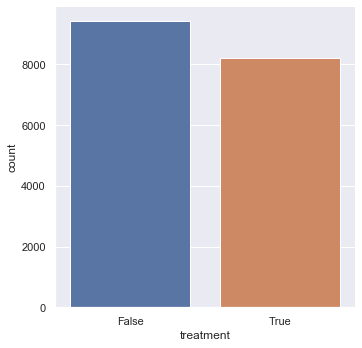

In [5]:
sns.factorplot('treatment',data=datos,kind="count")
datos.groupby('treatment').size()

Se observa que el 51% de la población no tiene tratamiento (False) y el 49% si tiene tratamiento (True). Como nos encontramos frente a un conjunto de datos balanceados se procede a ajustar el modelo sin realizar proceso de balanceo sobre la base, pues no incurririamos en sesgos en la estimación.

In [6]:
# Extraer las variables independientes 
X = datos.iloc[:,6:]
X.head()

,height,weight,age,smoking,excercise_frecuency,beer,wine,alcohol,strong_licor,sistolic,diastolic,heart_rate,pulse_pressure,cardiac_index,systemic_vascular_resistance
patient_id,,,,,,,,,,,,,,,
30,1.78,102.0,33.854327,0,5,0,0,1,0,120.457143,79.957143,72.685714,41.0,2.3,1158.0
31,1.67,82.4,71.064644,0,2,0,0,1,0,143.405405,91.067568,65.500000,52.0,2.8,1417.0
32,1.70,93.2,57.715030,0,1,0,1,1,0,122.557143,90.257143,80.628571,32.0,3.0,1319.0
33,1.60,61.3,43.645252,0,1,0,0,0,0,145.893939,93.863636,79.787879,52.0,4.2,1353.0
34,1.73,72.3,21.350970,0,1,1,0,1,0,130.376812,82.739130,77.913043,48.0,3.2,1172.0


In [7]:
np.shape(X)

(17644, 15)

Dividimos el conjunto de datos en dos partes, 80% para entrenar el modelo y el 20% para probarlo.

In [8]:
# Definición conjuntos de entrenamiento y de prueba 80% - 20%
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [9]:
#Ajustamos la regresión logística 
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=1000)
modelo = logreg.fit(X_train, y_train)

In [10]:
# Coeficientes estimados
m = modelo.coef_[0]
b = modelo.intercept_
print("coef=", m, "intercept=", b)

coef= [-0.11456712  0.00931574  0.05229116 -0.09707871 -0.00128953 -0.21203688
  0.11434791 -0.02266733 -0.06625093  0.03706638 -0.05226566 -0.00544973
 -0.03805878  0.00750459 -0.00134395] intercept= [-0.02696871]


### Medidas de ajuste conjunto de entrenamiento

In [11]:
# Precisión del modelo para el conjunto de entrenamiento
y_pred_train= modelo.predict(X_train)
print('Precisión conjunto entrenamiento: {:.4f}'.format(modelo.score(X_train,y_train)))

Precisión conjunto entrenamiento: 0.6481


In [12]:
# Matriz de confusión del modelo para el conjunto de entrenamiento
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_train, y_pred_train)
print('Matriz de Confusión:')
print(confusion_matrix)

Matriz de Confusión:
[[5301 2251]
 [2716 3847]]


Se observa que para el conjunto de entrenamiento la precisión del modelo es del 65%, lo que indica que el modelo clasificará bien los pacientes el 65% de las veces.

Al analizar la matriz de confusión: 
- Se observa que para los pacientes sin tratamiento la tasa de buena clasificación es de 69% y para los pacientes con tratamiento es de 61%.   
- También se observa que para los pacientes sin tratamiento la tasa de mala clasificación es de 31% y para los pacientes con tratamiento es de 39%.   

### Medidas de ajuste conjunto de prueba

In [13]:
# Predicción y precisión del modelo para el conjunto de prueba
y_pred_test= modelo.predict(X_test)
print('Precisión conjunto prueba: {:.4f}'.format(modelo.score(X_test, y_test)))

Precisión conjunto prueba: 0.6277


In [14]:
# Matriz de confusión del modelo para el conjunto de prueba
from sklearn.metrics import confusion_matrix
print('confusion_matrix')
confusion_matrix = confusion_matrix(y_test, y_pred_test)
print(confusion_matrix)

confusion_matrix
[[1296  581]
 [ 733  919]]


Se observa que para el conjunto de prueba la precisión del modelo es del 65%, lo que indica que el modelo clasificará bien los pacientes el 65% de las veces.

Al analizar la matriz de confusión: 
- Se observa que para los pacientes sin tratamiento la tasa de buena clasificación es de 70% y para los pacientes con tratamiento es de 61%.   
- También se observa que para los pacientes sin tratamiento la tasa de mala clasificación es de 30% y para los pacientes con tratamiento es de 39%.   